In [1]:
import pandas as pd
from data import Data

import numpy as np

In [2]:
data = Data("project_train.csv")
data.df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Label
0,0.545,0.884,5,-4.807,0,0.3670,0.290000,0.000000,0.3700,0.641,86.049,1
1,0.795,0.545,7,-8.153,1,0.3430,0.003960,0.000000,0.2730,0.809,91.967,1
2,0.489,0.871,5,-5.825,1,0.3860,0.002850,0.000004,0.1300,0.341,117.431,1
3,0.539,0.931,4,-1.803,0,0.2620,0.000713,0.000000,0.2040,0.685,85.571,0
4,0.918,0.734,11,-2.832,0,0.2690,0.029400,0.000008,0.1910,0.608,97.044,1
...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.897,0.612,11,-10.489,1,0.2110,0.029700,0.186000,0.0894,0.767,102.305,1
501,0.728,0.454,0,-9.281,1,0.0278,0.512000,0.000001,0.0831,0.323,130.368,0
502,0.571,0.837,0,-5.604,1,0.0377,0.165000,0.000005,0.1700,0.713,141.660,1
503,0.582,0.720,10,-9.722,0,0.2310,0.012700,0.035300,0.3630,0.541,89.273,1


In [3]:
data.df.loc[84, "energy"] = 0.734
data.df.loc[94, "loudness"] = -6.542

<AxesSubplot:>

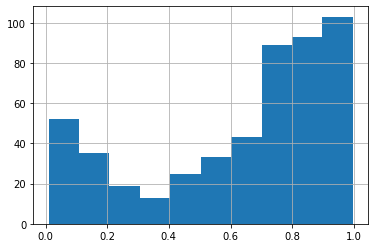

In [4]:
data.df["energy"].hist()

In [5]:
data._preprocess()
data.df

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,key_0,...,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode
0,0.058672,0.829155,2.322515,-0.070691,-0.542052,0.785789,0.623338,0.563904,-1.025026,0,...,0,0,1,0,0,0,0,0,0,-1.414913
1,1.387322,-0.290255,2.110548,-0.843690,-0.542052,0.301470,1.249577,0.091996,-0.808353,0,...,0,0,0,0,1,0,0,0,0,0.705357
2,-0.238945,0.786227,2.490322,-0.846690,-0.542041,-0.412527,-0.494946,0.420329,0.123948,0,...,0,0,1,0,0,0,0,0,0,0.705357
3,0.026785,0.984353,1.395161,-0.852465,-0.542052,-0.043046,0.787353,0.987577,-1.042527,0,...,0,1,0,0,0,0,0,0,0,-1.414913
4,2.041017,0.333840,1.456985,-0.774940,-0.542029,-0.107955,0.500327,0.842451,-0.622471,0,...,0,0,0,0,0,0,0,0,1,-1.414913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,1.929411,-0.069015,0.944732,-0.774130,-0.002648,-0.615243,1.093018,-0.237466,-0.429853,0,...,0,0,0,0,0,0,0,0,1,0.705357
501,1.031244,-0.590746,-0.673279,0.529245,-0.542048,-0.646699,-0.562043,-0.067094,0.597604,1,...,0,0,0,0,0,0,0,0,0,0.705357
502,0.196852,0.673956,-0.585843,-0.408493,-0.542037,-0.212808,0.891726,0.451498,1.011033,1,...,0,0,0,0,0,0,0,0,0,0.705357
503,0.255312,0.287611,1.121371,-0.820071,-0.439681,0.750838,0.250577,-0.129291,-0.906987,0,...,0,0,0,0,0,0,0,1,0,-1.414913


In [6]:
str(data)

'project_train.csv'

<AxesSubplot:>

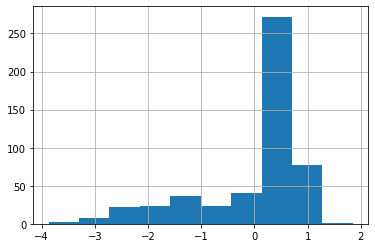

In [7]:
data.df["loudness"].hist()

In [8]:
data.labels

0      1
1      1
2      1
3      0
4      1
      ..
500    1
501    0
502    1
503    1
504    0
Name: Label, Length: 505, dtype: int64

In [9]:
from learning_machine import LDA

In [10]:
lda = LDA(data)
lda.input.df
str(lda)

'LDA'

In [11]:
lda._fit()
lda._evaluate_training()

The LDA model has been trained on the given data


In [12]:
lda.metrics

{'Train_Acc': 0.807920792079208}

In [28]:
pred = lda._predict(data.df)

In [20]:
labels = np.array(data.labels)

In [51]:
pred_0 = (pred == 0)
pred_1 = (pred == 1)

labels_0 = (labels == 0)
labels_1 = (labels == 1)

TP = (pred_1 & labels_1)
FP = (pred_1 & labels_0)
TN = (pred_0 & labels_0)
FN = (pred_0 & labels_1)

C = 1.0*TP + 2.0*FP + 3.0*TN + 4.0*FN
print(C)

C[C==1] = "r"
print(C)

[1. 1. 1. 2. 4. 1. 4. 3. 1. 3. 4. 3. 3. 2. 3. 3. 4. 3. 1. 4. 3. 1. 1. 4.
 4. 4. 4. 4. 1. 1. 1. 1. 3. 1. 3. 3. 3. 3. 3. 2. 4. 3. 3. 2. 2. 3. 1. 1.
 1. 2. 3. 1. 3. 2. 2. 3. 4. 3. 4. 3. 3. 3. 3. 2. 2. 4. 1. 1. 2. 1. 4. 1.
 1. 1. 4. 3. 4. 4. 3. 1. 3. 3. 3. 2. 4. 1. 4. 3. 3. 3. 4. 4. 2. 3. 4. 1.
 3. 1. 4. 4. 4. 1. 1. 4. 1. 4. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 4. 4. 1. 4.
 1. 1. 1. 1. 1. 1. 1. 4. 4. 4. 4. 4. 1. 4. 1. 1. 4. 1. 4. 4. 4. 4. 1. 1.
 1. 1. 4. 1. 1. 1. 4. 4. 1. 4. 4. 1. 4. 1. 4. 1. 1. 4. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 4. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 4. 1. 1. 1. 1. 4. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 4. 1. 4. 4. 1. 4.
 4. 1. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.

ValueError: could not convert string to float: 'r'